# Continuity in street networks

Momepy allows for the deduction of natural continuity of street networks using the COINS algorithm. The street network is split into individual segments and deflection angles between adjacent segments are computed. Segments are then joined to continuous strokes. Segments will only be considered a part of the same stroke if the deflection angle is above the threshold (defaults to zero).

## Using small network

In [1]:
import momepy
import geopandas as gpd

In [2]:
streets = gpd.read_file(momepy.datasets.get_path('bubenec'),
                        layer='streets')

/Users/martin/Git/geopandas/geopandas/geodataframe.py:580: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:


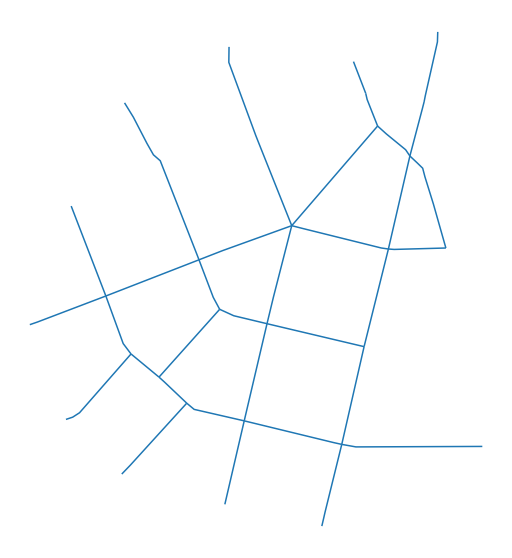

In [3]:
streets.plot(figsize=(10, 10)).set_axis_off()

`momepy.COINS` allows you to create a `GeoDataFrame` of the final merged strokes or return a `Series` with a stroke attribute which can be attached to the original geometry.

You first need to compute continuity using the `momepy.COINS` class.

In [4]:
continuity = momepy.COINS(streets)

Now you can generate required outputs.

In [6]:
stroke_gdf = continuity.stroke_gdf()
stroke_gdf

,n_segments,geometry
stroke_group,,
0,8,"LINESTRING (1603278.899 6463669.186, 1603283.7..."
1,19,"LINESTRING (1603077.500 6464475.323, 1603085.5..."
2,17,"LINESTRING (1603537.194 6464558.112, 1603557.6..."
3,13,"LINESTRING (1603706.388 6464617.784, 1603705.7..."
4,5,"LINESTRING (1603413.206 6464228.730, 1603274.4..."
5,14,"LINESTRING (1602970.377 6464268.058, 1602974.0..."
6,2,"LINESTRING (1603071.956 6463729.979, 1603089.0..."
7,3,"LINESTRING (1602959.880 6463839.712, 1602973.3..."
8,3,"LINESTRING (1603146.696 6463924.630, 1603157.0..."


We can plot the data using an unique color per stroke geometry.

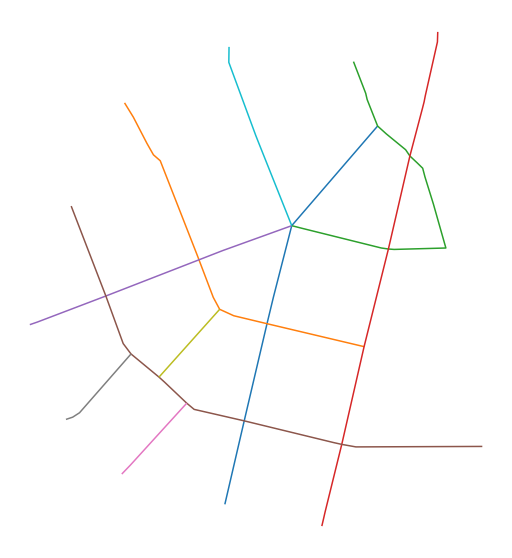

In [7]:
stroke_gdf.plot(cmap="tab10", figsize=(10, 10)).set_axis_off()

In [8]:
streets["continuity_stroke"] = continuity.stroke_attribute()

In [10]:
streets.head()

,geometry,continuity_stroke
0,"LINESTRING (1603585.640 6464428.774, 1603413.2...",0
1,"LINESTRING (1603268.502 6464060.781, 1603296.8...",1
2,"LINESTRING (1603607.303 6464181.853, 1603592.8...",2
3,"LINESTRING (1603678.970 6464477.215, 1603675.6...",3
4,"LINESTRING (1603537.194 6464558.112, 1603557.6...",2


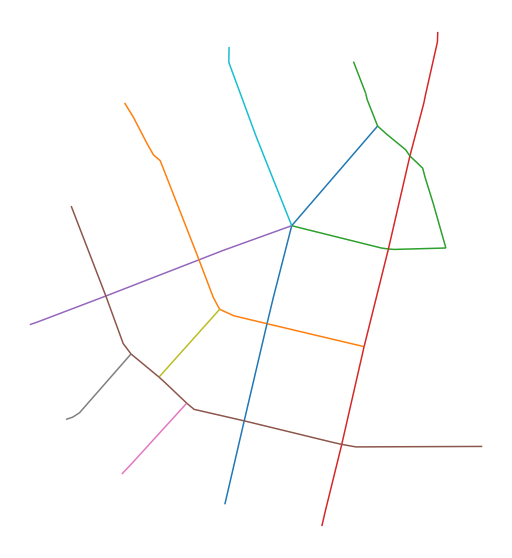

In [12]:
streets.plot("continuity_stroke", categorical=True, figsize=(10, 10)).set_axis_off()

## Using OpenStreetMap data

In [13]:
import osmnx as ox

In [14]:
streets_graph = ox.graph_from_place('Vicenza, Vicenza, Italy', network_type='drive')
streets_graph = ox.projection.project_graph(streets_graph)

streets = ox.graph_to_gdfs(ox.get_undirected(streets_graph), nodes=False, edges=True,
                                   node_geometry=False, fill_edge_geometry=True)

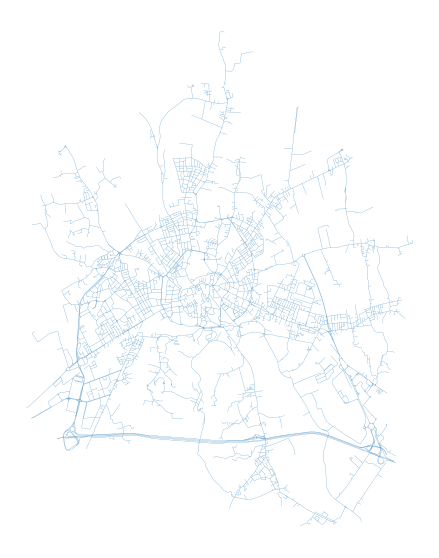

In [15]:
streets.plot(figsize=(10, 10), linewidth=0.2).set_axis_off()

In [16]:
continuity = momepy.COINS(streets)

In [17]:
stroke_gdf = continuity.stroke_gdf()

We can look into the continuity-based hierarchy of streets based on their total length.

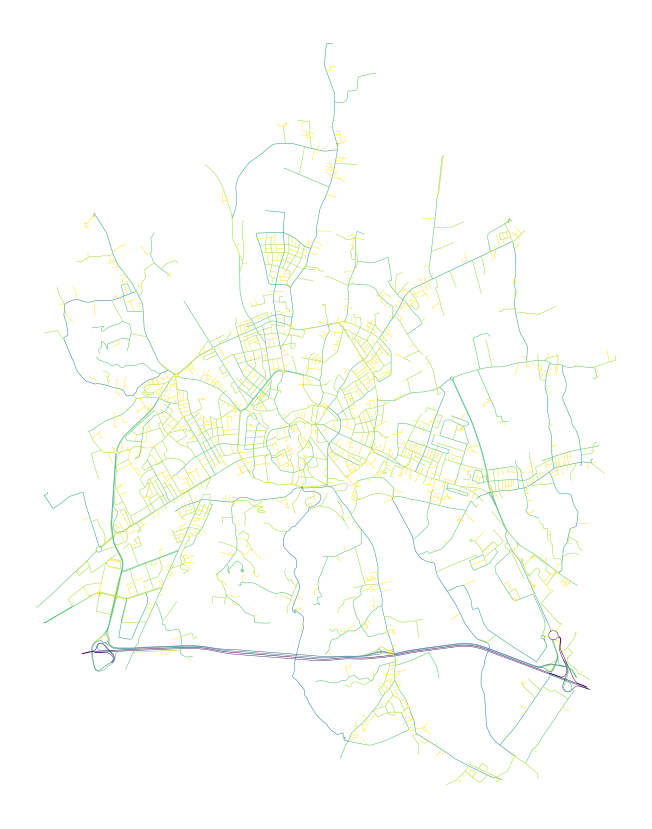

In [38]:
stroke_gdf.plot(stroke_gdf.length, 
                figsize=(15, 15), 
                cmap="viridis_r", 
                linewidth=.5, 
                scheme="headtailbreaks"
               ).set_axis_off()

For details, see the original paper:

Tripathy, P., Rao, P., Balakrishnan, K., & Malladi, T. (2020). An open-source tool to extract natural continuity and hierarchy of urban street networks. _Environment and Planning B: Urban Analytics and City Science_. http://dx.doi.org/10.1177/2399808320967680